<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [107]:
from tensorflow import keras
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.utils import normalize
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [52]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [25]:
x_train[3]

array([3.9610e-02, 0.0000e+00, 5.1900e+00, 0.0000e+00, 5.1500e-01,
       6.0370e+00, 3.4500e+01, 5.9853e+00, 5.0000e+00, 2.2400e+02,
       2.0200e+01, 3.9690e+02, 8.0100e+00])

In [55]:
x_train = normalize(x_train, order=1)
x_test = normalize(x_test, order=1)

In [79]:
model = Sequential()

model.add(Dense(15, input_dim=13, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['MSE'])

In [80]:
model.fit(x_train, y_train, epochs=250, verbose=False)

In [81]:
scores = model.evaluate(x_test,y_test)
print(f"{model.metrics_names[1]}: {scores[1]}")

102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [82]:
history = model.fit(x_train, y_train, validation_split=0.25, epochs=250, verbose=False);

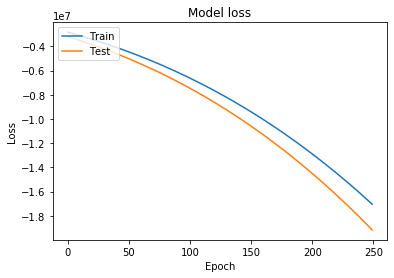

In [83]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression(normalize=True, n_jobs=-1)

lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

mean_squared_error(y_test, y_pred)

18.208748851102943

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [141]:
from tensorflow.keras.datasets import fashion_mnist

(xf_train, yf_train), (xf_test, yf_test) = fashion_mnist.load_data()

In [142]:
xf_train.shape, yf_train.shape, xf_test.shape, yf_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [143]:
xf_train = xf_train.reshape((xf_train.shape[0], 28 * 28))
xf_test = xf_test.reshape((xf_test.shape[0], 28 * 28))

xf_train = xf_train.astype("float32") / 255.0
xf_test = xf_test.astype("float32") / 255.0
 
yf_train = to_categorical(yf_train, 10)
yf_test = to_categorical(yf_test, 10)

In [144]:
xf_train.shape, yf_train.shape, xf_test.shape, yf_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

In [149]:
model = Sequential()

model.add(Dense(64, activation='relu', input_dim=784))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_64 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_65 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_66 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_67 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_68 (Dense)             (None, 10)                330       
Total params: 55,818
Trainable params: 55,818
Non-trainable params: 0
_________________________________________________

In [150]:
model.fit(xf_train, yf_train, epochs=10, verbose=False)

In [151]:
scores = model.evaluate(xf_test,yf_test)
print(f"{model.metrics_names[1]}: {scores[1] * 100}")

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

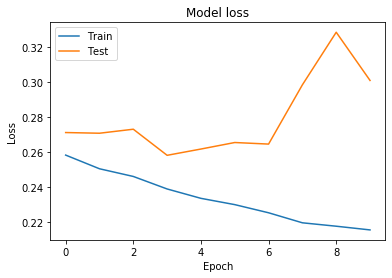

In [152]:
history = model.fit(xf_train, yf_train, epochs=10, validation_split=0.25, verbose=False);

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.